Boston Housing Dataset
Predicting Median value of owner-occupied homes
The aim of this assignment is to learn the application of machine learning algorithms to data sets. This involves learning what data means, how to handle data, training, cross validation, prediction, testing your model, etc.
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive, and has been used extensively throughout the literature to benchmark algorithms. The data was originally published by Harrison, D. and Rubinfeld, D.L. Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
The dataset is small in size with only 506 cases. It can be used to predict the median value of a home, which is done here. There are 14 attributes in each case of the dataset. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.preprocessing import MinMaxScaler

In [38]:
#importing datasets
phi=pd.read_csv('/content/drive/MyDrive/Guvi_collab/train.csv')
phi_test=pd.read_csv('/content/drive/MyDrive/Guvi_collab/test.csv')

In [39]:
#assigning x and y values
x=phi.iloc[:,1:14]  #dropping index column and assigning rest of the variables as x
y=phi.iloc[:,14:]
x_test=phi_test.iloc[:,1:14]

Pre-processing and scaling data 

In [40]:
#scaling x variables using minmax scaler with default range 0-1
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x_test=scaler.fit_transform(x_test)
print((x[0]))
print(x_test[0])

[0.01064112 0.         0.28152493 0.         0.31481481 0.41124515
 0.88465499 0.30224882 0.13043478 0.22900763 0.89361702 0.77174845
 0.4260749 ]
[0.00202307 0.3        0.13663891 0.         0.07515658 0.58012821
 0.62553648 0.63652632 0.2173913  0.21414914 0.46511628 0.99420216
 0.30269504]


In [41]:
#scaling the y variable by log 
y=y.to_numpy()
y=np.log(y)

In [42]:
x[4] 

array([4.08915022e-04, 0.00000000e+00, 1.01906158e-01, 0.00000000e+00,
       1.54320988e-01, 4.32141318e-01, 3.01750772e-01, 4.31394302e-01,
       1.30434783e-01, 4.63740458e-01, 4.57446809e-01, 9.28564224e-01,
       1.98890430e-01])

In [115]:
#ValueError: setting an array element with a sequence - getting this error for this function -- need to check

""""def gradient_descentLR(x,y,learning_rate,iter):
  m=x.shape[0] #no of samples
  x=np.c_[np.ones(x.shape[0]),x] #concatenating new column for theta0 
  n=x.shape[1] # no of features 
  theta=np.ones(n)  #initializing array of ones as initial parameter of theta.
  h=np.dot(x,theta) #so this is our predicted y^ using a initial parameter theta * x
  error=h-y         # error is predicted(h)-actual(y) 
  cost=np.ones(iter) #initializing a matrix of ones as cost, later in loop we'll update the values in each index.
  
  for i in range(0,iter):   #for iterating over no of times
    theta[0] = theta[0] - (learning_rate /x.shape[0]) * sum(error)
    for j in range(1,n):    #iterating through each feature
      theta[j]=theta[j]-(learning_rate/x.shape[0])*np.dot(np.transpose(x),error)  
    h=np.dot(x,theta)
    error=h-y
    cost[i]=(1/(2*m))*np.dot(np.transpose(error),error)
  return cost,theta""""

Initializing parameters and variables needed to compute cost and gradient function.

In [43]:
  m=x.shape[0] #no of samples
  x=np.c_[np.ones(x.shape[0]),x] #concatenating new column for theta0 
  n=x.shape[1] # no of features 
  theta=np.ones(n)  #initializing array of ones as initial parameter of theta.
  y_new = np.reshape(y, (len(y)))  #reshaping in order to match h.shape which is (400,)

"***python numpy ValueError: operands could not be broadcast together with shapes***" - to tackle this error i have reshaped the y into y_new.
because without reshaping the shape of h (400,) is not equal to shape of y (400,1) so it throws the above error. reshaping h is not possible while on loop so i have reshaped the y into y_new compatible to h

In [210]:
y_new.shape==h.shape

True

Gradient descent function 

In [44]:
def gradient_descentLR(x,y,theta,learning_rate,iter):
  cost_lst = []   #to record all cost values to this list
  theta_lst = []  #to record all theta_0 and theta_1 values to this list 
  predictedY_lst = []
  cost_lst.append(10)   #initializing with random number ex=1 
  
  for i in range(0,iter):
    h=x.dot(theta)  #so this is our predicted y^ using a initial parameter theta * x
    predictedY_lst.append(h)
    error=h-y_new #error is predicted(h)-actual(y)
    cost=(1/(2*m))*np.dot(np.transpose(error),error)
    cost_lst.append(cost)
    theta=theta-(learning_rate * (1/m) * np.dot(np.transpose(x),(error)))
    theta_lst.append(theta)
  return cost_lst,predictedY_lst,theta_lst

In [62]:
cost_lst,predictedY_lst,theta_lst=gradient_descentLR(x,y,theta,0.52,150)

In [63]:
cost_lst[-10:]

[0.0365776930935714,
 0.03646211709662591,
 0.03634774459465294,
 0.036234551597293614,
 0.036122514790045794,
 0.0360116115121585,
 0.035901819735325885,
 0.03579311804314825,
 0.03568548561132855,
 0.035578902188575276]

In [64]:
theta_lst[-1]

array([ 1.58866184,  0.18457297,  0.08464386,  0.22835619,  0.15262759,
        0.21693549,  1.53062793,  0.12131762,  0.53878577, -0.0471673 ,
       -0.26692246,  0.00605826,  0.61657503, -0.3888131 ])

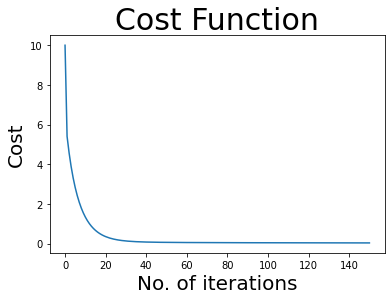

In [65]:
plt.title('Cost Function', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_lst)
plt.show()

Generating function to calculate gradient descent with L1 norm and L2 norm. With various lambda values.

In [24]:
  m=x.shape[0] #no of samples
  x=np.c_[np.ones(x.shape[0]),x] #concatenating new column for theta0 
  n=x.shape[1] # no of features 
  theta=np.ones(n)  #initializing array of ones as initial parameter of theta.
  y_new = np.reshape(y, (len(y)))

In [29]:
def gradient_descent_regularisation(x,y,theta,learning_rate,iter,lambda_val,norm):
  cost_lst = []   #to record all cost values to this list
  theta_lst = []  #to record all theta_0 and theta_1 values to this list 
  predictedY_lst = []
  cost_lst.append(10)   #initializing with random number ex=1 
  
  for i in range(0,iter):
    h=x.dot(theta)  #so this is our predicted y^ using a initial parameter theta * x
    predictedY_lst.append(h)
    error=h-y_new #error is predicted(h)-actual(y)
    
    if norm=='l':
      lasso=(lambda_val / 2 * m) * np.sum(theta)  #lasso or l1 norm is product of lambda and absolute value of theta(h)
      cost=(1/(2*m))*np.dot(np.transpose(error),error)+lasso #adding lasso into cost function
      cost_lst.append(cost)
      theta=theta-(learning_rate * ((1/m) * np.dot(np.transpose(x),error))+lasso)
      theta_lst.append(theta)

    
  return cost_lst,predictedY_lst,theta_lst

In [33]:
cost_lst,predictedY_lst,theta_lst=gradient_descent_regularisation(x,y,theta,0.5,100,1,'l')

<ipython-input-29-60b4c842f393>:13: RuntimeWarning: overflow encountered in double_scalars
  lasso=(lambda_val / 2 * m) * np.sum(theta)


In [36]:
cost_lst[-10:]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]